<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [ ]:
united = Table.read_table(path_data + 'trip.csv')
united

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [ ]:
united.column('Duration').min()

60

In [ ]:
united.column('Duration').max()

17270400

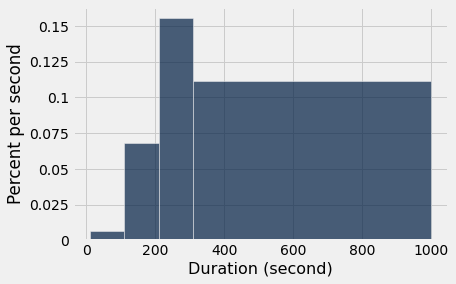

In [ ]:
duration_bins = np.append(np.arange(10, 400, 100), 1000)
united.hist('Duration', bins = duration_bins, unit = 'second')

In [ ]:
united.where('Duration', are.above(300)).num_rows/united.num_rows

0.8092768076983894

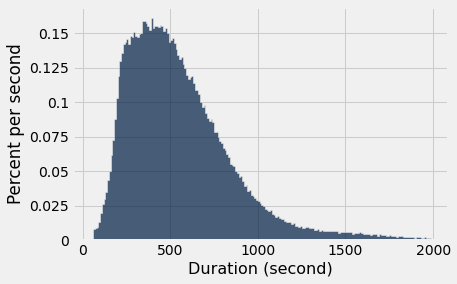

In [ ]:
duration_bins = np.arange(40, 2000, 10)
united.hist('Duration', bins = duration_bins, unit = 'second')

In [ ]:
united.where('Duration', are.between(0, 1500)).num_rows/united.num_rows

0.9428578689376313

In [ ]:
def empirical_hist_duration(n):
    united.sample(n).hist('Duration', bins = duration_bins, unit = 'second')

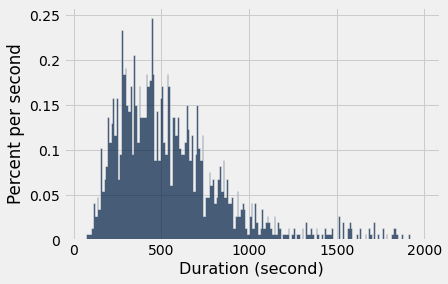

In [ ]:
empirical_hist_duration(1500)

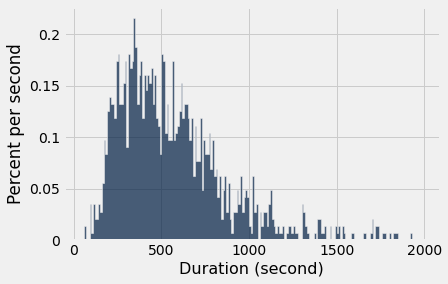

In [ ]:
empirical_hist_duration(1500)

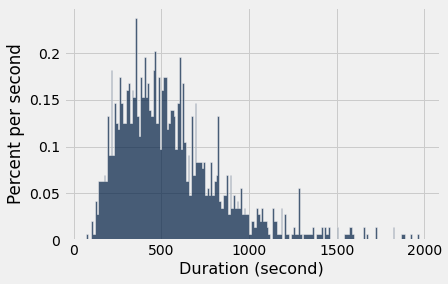

In [ ]:
empirical_hist_duration(1500)

In [ ]:
united = Table.read_table(path_data + 'trip.csv')

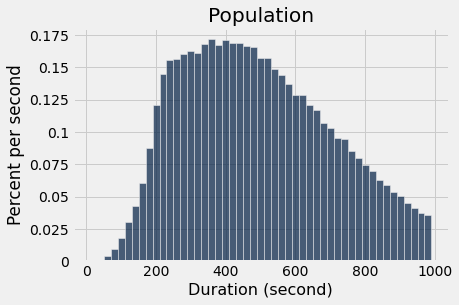

In [ ]:
duration_bins = np.arange(10, 1000, 20)
united.hist('Duration', bins = duration_bins, unit = 'second')
plots.title('Population');

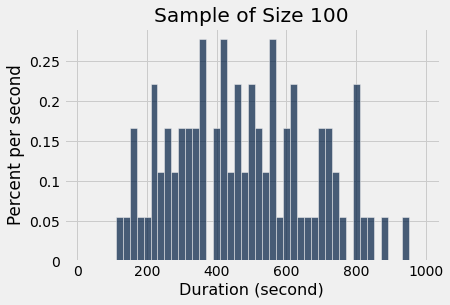

In [ ]:
sample_100 = united.sample(100)
sample_100.hist('Duration', bins = duration_bins, unit = 'second')
plots.title('Sample of Size 100');

In [ ]:
np.median(united.column('Duration'))

511.0

In [ ]:
united.where('Duration', are.below_or_equal_to(511)).num_rows / united.num_rows

0.5002513045246109

In [ ]:
united.where('Duration', are.equal_to(511)).num_rows

541

In [ ]:
np.median(sample_100.column('Duration'))

503.5

In [ ]:
np.median(united.sample(100).column('Duration'))

569.0

In [ ]:
def random_sample_median():
    return np.median(united.sample(100).column('Duration'))

In [ ]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [ ]:
simulated_medians = Table().with_column('100 Sample Median', medians)
simulated_medians

100 Sample Median
545.5
559.5
572.5
478
512.5
507
610.5
477.5
523
525.5


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


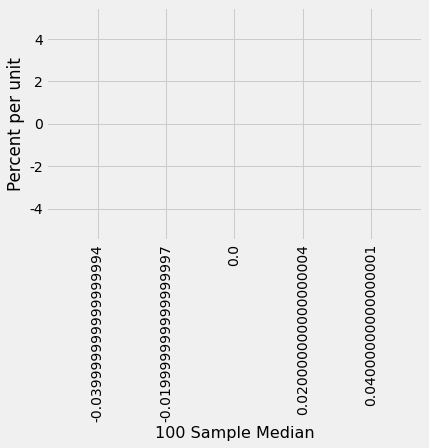

In [ ]:
simulated_medians.hist(bins=np.arange(0, 10, 1))

In [ ]:
def random_sample_median():
    return np.median(united.sample(400).column('Duration'))

In [ ]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [ ]:
simulated_medians = Table().with_column('400 Sample Median', medians)
simulated_medians

400 Sample Median
524.5
504.5
522.5
502
512
538
515
494
495.5
503.5


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


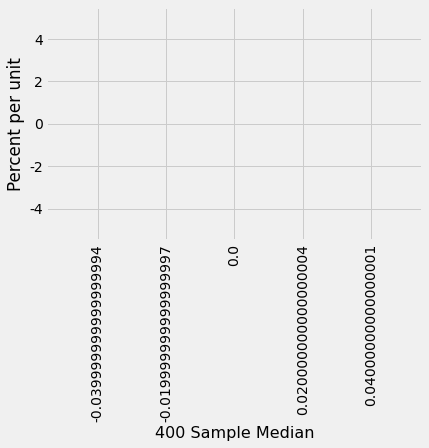

In [ ]:
simulated_medians.hist(bins=np.arange(0, 5, 1))

The sample median is cllose towards the center of the histogram. Compared to the histogram of sampe of size 100, sample of size 400 has more width in its standard deviation. 